## Exploratory Data Analysis

In [68]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# to eliminate warnings
import warnings
warnings.simplefilter('ignore')

In [72]:
# load dataset
data = pd.read_excel(r'20190109123920.xlsx')

# Create target variable
data['target'] = [1 if row in ['Incobrável', 'Em recuperação'] else 0 for row in data['Estado']]

# Variables to drop
data.drop(['# Ordem','Estado','# ofertas'], axis = 1, inplace = True)

# rows and columns shape
print(data.shape)

# visualize dataset
data.head()

(1016, 11)


,Anos atividade,Região,Receitas,Ativos,Montante,BR,Prazo,# pmts pagas,Taxa ind.,Taxa med,target
0,22,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",2500,A,6,6.0,0.032,0.034630,0
1,25,Estremadura e Ribatejo,"100,000 - 350,000","500,000-1,500,000",20000,B+,36,25.0,0.049,0.049287,1
2,15,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",10000,B+,24,24.0,0.046,0.048462,0
3,13,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",20000,A,48,48.0,0.042,0.044945,0
4,27,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",5000,C,6,6.0,0.087,0.088742,0


**Exploratory Analysis aims to identify:**
1. Missing values
2. Numerical values and their distribution
3. Outliers
4. Categorical variables and str corrections
5. Cardinality of categorical variables
6. Explore relationships between variables and target variable (Estado)

### Target Variable

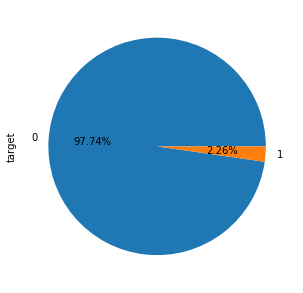

In [73]:
def convert_target_variable(df):
    df = df.copy()
    
    # plot a pie chart with the target variable distribution values
    plt.figure(figsize=[5,5])
    df['target'].value_counts().plot(kind = 'pie', autopct='%1.2f%%')
    plt.show()

convert_target_variable(data)

The target variable is imbalanced. It means that we will have to oversample the categorie 1.

### Missing Values

In [74]:
# make a list of variables with na values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(data[var].isnull().mean(), 3), '% of missing values')

# pmts pagas 0.001 % of missing values


**Relatioship between missing values and Target**

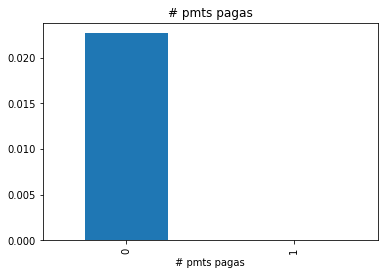

In [75]:
def analyze_na_value(df, var):
    df = df.copy()
    
    # replaces the value for 1 if the value is missing and 0 if it not missing
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    #plot the variables with missing data
    #sns.barplot(x = var, y = 'target', data = df)
    df.groupby(var)['target'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyze_na_value(data, var)

We can conclude there's no predictive relevance on the missing data

### Categorical Variables

In [76]:
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']
print('Number of categorical variables: ', len(cat_vars))

data[cat_vars].head()

Number of categorical variables:  5


,Região,Receitas,Ativos,BR,Taxa ind.
0,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",A,0.032
1,Estremadura e Ribatejo,"100,000 - 350,000","500,000-1,500,000",B+,0.049
2,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",B+,0.046
3,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",A,0.042
4,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",C,0.087


In [27]:
data['Taxa ind.'].unique()

array([0.032, 0.049, 0.046, 0.042, 0.087, 0.062, 0.0554, 0.0417, 0.0716,
       0.0617, 0.0867, 0.0516, 0.0416, 0.0967, 0.0316, 0.0605, 0.0509,
       0.0708, 0.0457, 0.0408, 0.0915, 0.0305, 0.0609, 0.0406, 0.0856,
       0.03, 0.0557, 0.0506, 0.07069602351104329, 0.0657, 0.0959, 0.1,
       0.0357, 0.0999, 0.0649, 0.0907, 0.0549, 0.0782, 0.0834,
       0.045700000000000005, 0.0874, 0.0958, 0.0455, 0.0748, '6,57%',
       '6,09%', 0.0997, 0.0731, 0.0957, 0.0747, '7,07%', 0.0995, 0.0781,
       0.0815, 0.0906, 0.0998, 0.08, 0.0592, 0.0648851944999995,
       0.07079645043014725, 0.07486817584879389, 0.06087675517637628,
       0.09990000000019456, 0.0792, 0.0692, 0.0917, 0.06,
       0.07919999999999999, 0.060899999999999996, 0.054900000000000004,
       0.08560000000000001, 0.0639, 0.0492, 0.09, 0.044800000000000006,
       0.06570000000000001, 0.035, 0.0538, 0.0475, 0.0738, 0.0479, 0.0904,
       0.0431, 0.0679, 0.0981, 0.0579, 0.10289999999999999,
       0.053099999999999994, 0.06309

**The variable "Taxa ind." should be of type float as it referes to a rate. It has some elements that are converting it to string.**

In [77]:
# remove the sign %
data['Taxa ind.'] = [str(row).rstrip("%") for row in data['Taxa ind.']]

# replace , for .
data['Taxa ind.'] = [row.replace(',','.') for row in data['Taxa ind.']]

# divides per 100 if the value is above 1
data['Taxa ind.'] = [float(row)/100 if float(row) >=1 else row for row in data['Taxa ind.']]

# converts to float
data['Taxa ind.'] = data['Taxa ind.'].astype('float64')

# categorical variables
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']
print('Number of categorical variables: ', len(cat_vars))

data[cat_vars].head()

Number of categorical variables:  4


,Região,Receitas,Ativos,BR
0,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",A
1,Estremadura e Ribatejo,"100,000 - 350,000","500,000-1,500,000",B+
2,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",B+
3,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",A
4,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",C


**Cardinality**

In [78]:
for var in cat_vars:
    print(var, len(data[var].unique()), ' categories')

Região 10  categories
Receitas 5  categories
Ativos 5  categories
BR 10  categories


**Rare labels**

In [80]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    
    tmp = df.groupby(var)['target'].count() / len(df)
    return tmp[tmp < rare_perc]

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

BR
-      0.000984
PME    0.006890
Name: target, dtype: float64



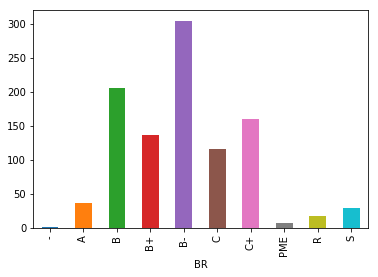

In [85]:
data.groupby('BR')['target'].count().plot.bar()
plt.show()

**It's important to deal with the rare labels**

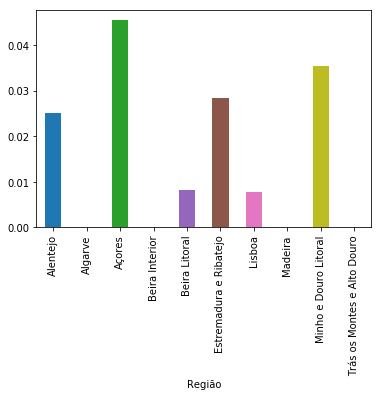

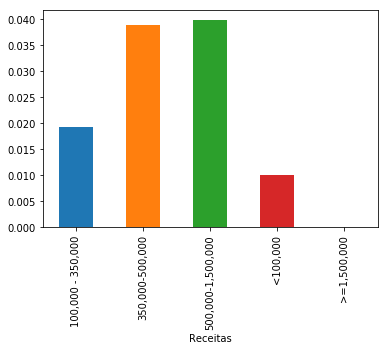

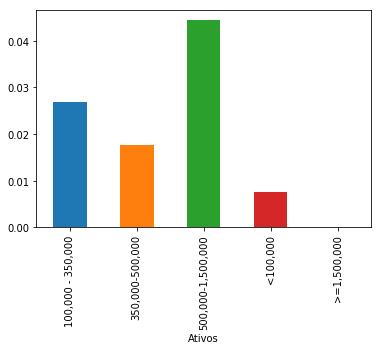

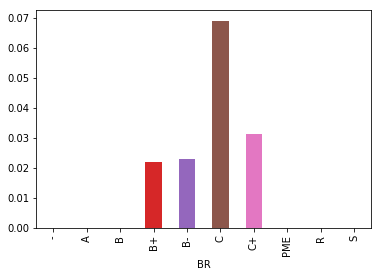

In [87]:
def analyse_cat_variables(df, var):
    df = df.copy()
    
    #plot
    df.groupby(var)['target'].mean().plot.bar()
    plt.show()
    return None

for var in cat_vars:
    analyse_cat_variables(data, var)

### Numerical Variables

In this section we intend to explore:
1. Temporal Variables (Ex: Year, Month)
2. Discrete Variables (Numerical variables with finite number of values)
3. Continuos Variables (Variables not temporal and not discrete)

In [93]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O' and var != 'target']
print('Number of numerical variables: ', len(num_vars))

# visualize the numerical variables
data[num_vars].head()

Number of numerical variables:  6


,Anos atividade,Montante,Prazo,# pmts pagas,Taxa ind.,Taxa med
0,22,2500,6,6.0,0.032,0.034630
1,25,20000,36,25.0,0.049,0.049287
2,15,10000,24,24.0,0.046,0.048462
3,13,20000,48,48.0,0.042,0.044945
4,27,5000,6,6.0,0.087,0.088742


**Discrete Variables**

In [94]:
# list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20]
print('Number of discrete variables: ', len(discrete_vars))

# visualize the discrete variables
data[discrete_vars].head()

Number of discrete variables:  1


,Prazo
0,6
1,36
2,24
3,48
4,6


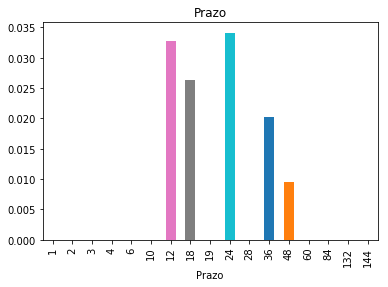

In [92]:
def analyse_discrete_vars(df, var):
    df = df.copy()
    
    # plot
    df.groupby(var)['target'].mean().plot.bar()
    plt.title(var)
    plt.show()

for var in discrete_vars:
    analyse_discrete_vars(data, var)

**Continuos Variables**

In [95]:
cont_vars = [var for var in num_vars if var not in discrete_vars]
print('Continuos variables: ', len(cont_vars))

data[cont_vars].head()

Continuos variables:  5


,Anos atividade,Montante,# pmts pagas,Taxa ind.,Taxa med
0,22,2500,6.0,0.032,0.034630
1,25,20000,25.0,0.049,0.049287
2,15,10000,24.0,0.046,0.048462
3,13,20000,48.0,0.042,0.044945
4,27,5000,6.0,0.087,0.088742


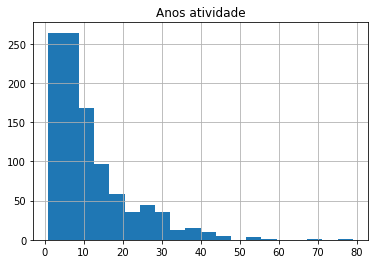

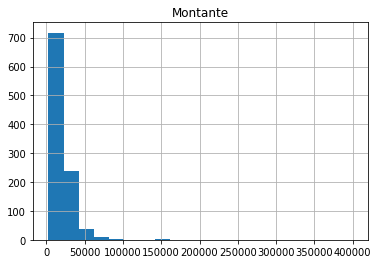

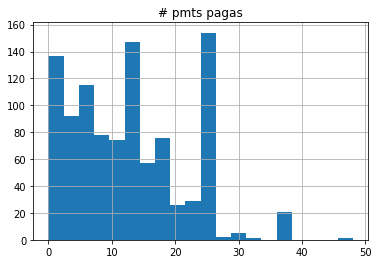

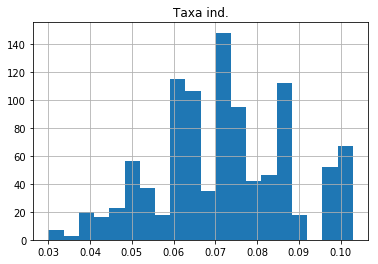

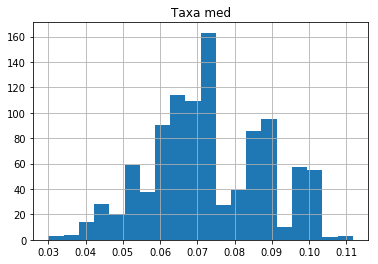

In [96]:
def analyse_cont_vars(df, var):
    df = df.copy()
    df[var].hist(bins = 20)
    plt.title(var)
    plt.show()

for var in cont_vars:
    analyse_cont_vars(data, var)

We see that all of the above variables, are not normally distributed. For linear models to perform best, we need to account for non-Gaussian distributions.

**Log Transformation**

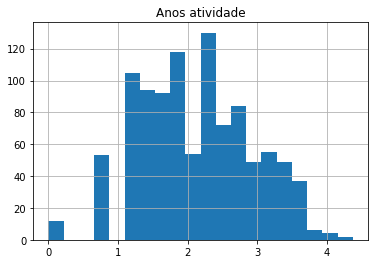

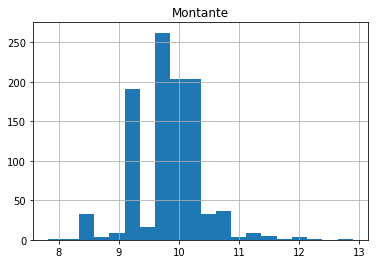

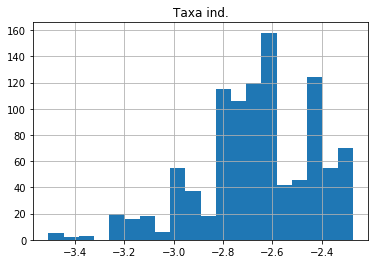

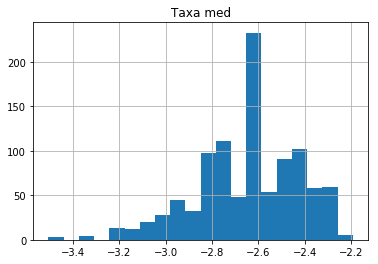

In [97]:
# Analyze the distribution of transformed continuos variables
def analyse_transformed_continuos(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins = 20)
        plt.title(var)
        plt.show()

for var in cont_vars:
    analyse_transformed_continuos(data, var)

**Relationship between transformed variables and target variable**

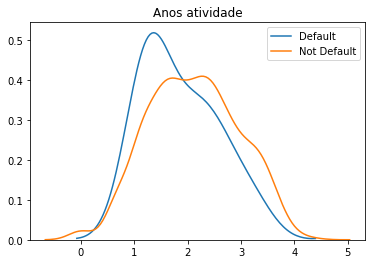

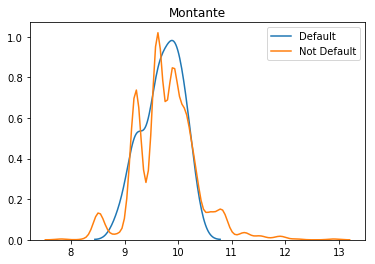

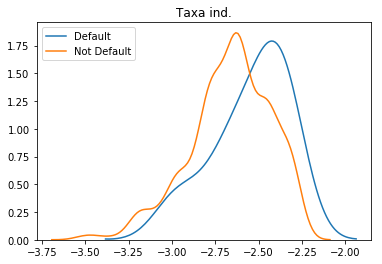

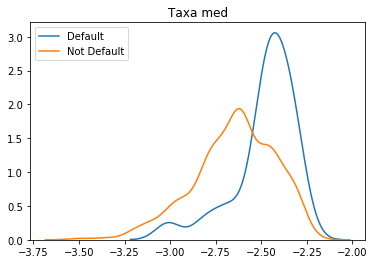

In [98]:
# Analyze the distribution of transformed continuos variables
def analyse_transformed_continuos(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        sns.kdeplot(df.loc[df['target']==1, var], label = 'Default')
        sns.kdeplot(df.loc[df['target']==0, var], label = 'Not Default')
        plt.title(var)
        plt.show()

for var in cont_vars:
    analyse_transformed_continuos(data, var)

**Outliers**

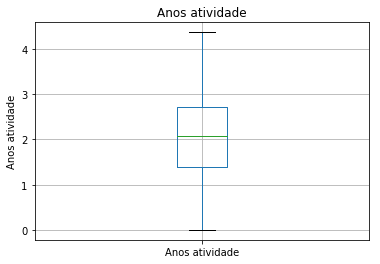

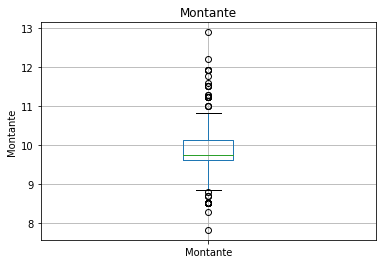

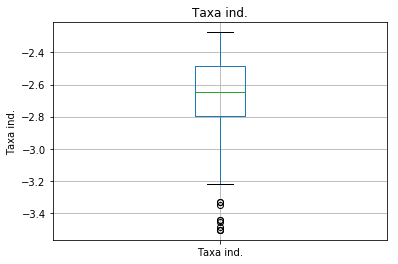

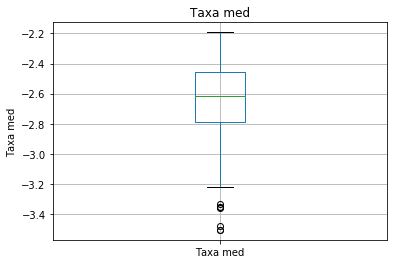

In [99]:
def find_outliers(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()

for var in cont_vars:
    find_outliers(data, var)

The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. So it is worth spending some time understanding if removing outliers will add performance value to our final machine learning model.

## Final conclusions

- Balance the target variable
- Convert the variable "Estado" to binary variable "Target"
- Drop columns ['# Ordem','Estado','# ofertas']
- Convert variable "Taxa ind." from str to float
- Treat rare labes on column "BR"

In [3]:
data.head()

,# Ordem,Estado,Anos atividade,Região,Receitas,Ativos,Montante,BR,Prazo,# pmts pagas,Taxa ind.,Taxa med,# ofertas
0,0001,Pago,22,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",2500,A,6,6.0,0.032,0.034630,31
1,0002,Incobrável,25,Estremadura e Ribatejo,"100,000 - 350,000","500,000-1,500,000",20000,B+,36,25.0,0.049,0.049287,33
2,0003,Pago,15,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",10000,B+,24,24.0,0.046,0.048462,46
3,0004,Pago,13,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",20000,A,48,48.0,0.042,0.044945,85
4,0005,Pago,27,Estremadura e Ribatejo,"100,000 - 350,000","100,000 - 350,000",5000,C,6,6.0,0.087,0.088742,39


In [44]:
X = data.drop(['target'], axis = 1)
y = data.target

In [45]:
# dependent and independent variables
X = data.drop(['target'], axis = 1)
y = data.target

# for handle imbalanced dataset by Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=88)

# fit to data
X_resampled, y_resampled = ros.fit_sample(X, y)

# before balancing
yvals, counts = np.unique(data['target'], return_counts=True)
print('Classes in test set:',dict(zip(yvals, counts)))

# after balancing
yvals_ros, counts_ros = np.unique(y_resampled, return_counts=True)
print('Classes in rebalanced test set:',dict(zip(yvals_ros, counts_ros)))

Classes in test set: {0: 993, 1: 23}
Classes in rebalanced test set: {0: 993, 1: 993}


In [46]:
def replace_categories(data, var, target):
    ordered_labels = data.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    data[var] = data[var].map(ordinal_label)

for var in cat_vars:
    replace_categories(data, var, 'target')

# dependent and independent variables
data.dropna(inplace = True)
X = data.drop(['target'], axis = 1)
y = data.target

In [54]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(X, y)

# before balancing
yvals, counts = np.unique(data['target'], return_counts=True)
print('Classes in test set:',dict(zip(yvals, counts)))

# after balancing
yvals_ros, counts_ros = np.unique(oversampled_trainY, return_counts=True)
print('Classes in rebalanced test set:',dict(zip(yvals_ros, counts_ros)))

Classes in test set: {0: 971, 1: 23}
Classes in rebalanced test set: {0: 971, 1: 971}


In [56]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

data.dropna(inplace = True)
X = data.drop(['target'], axis = 1)
y = data.target

#Train the classifier.
bbc.fit(X, y)
preds = bbc.predict(X)

In [64]:
from sklearn.metrics import roc_auc_score, r2_score, confusion_matrix

print(roc_auc_score(y, preds))

0.9181256436663234


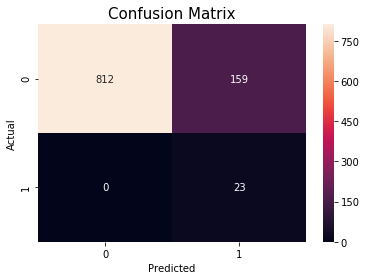

In [65]:
sns.heatmap(confusion_matrix(y, preds), annot=True,fmt='2.0f')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix', y=1.05, size=15)
plt.show()